<a href="https://colab.research.google.com/github/LydiaDEdou/projet/blob/main/Simple_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TP : Étapes de Construction d'un CNN**

**Objectifs**:

    

1.   Comprendre le fonctionnement des convolutions, max pooling et des fonctions  d'activation.
2.   Implémenter ces concepts de manière pratique.
3.     Construire un réseau de neurones convolutif (CNN) étape par étape et l'appliquer sur un jeu de données simple.


    


**Étape 1 : Compréhension de la Convolution 2D**



1.       Commencez par expliquer la convolution en appliquant un filtre (par exemple, 3x3) sur une image en utilisant NumPy.
2.      Objectif : Observer comment un filtre appliqué à une image change celle-ci (par exemple, détecter les bords).






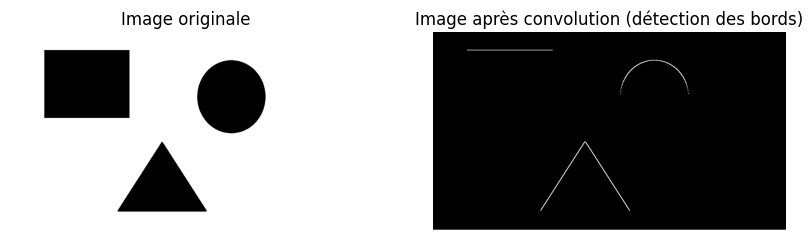

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from PIL import Image  # Pour charger l'image

# Chargement de l'image et conversion en niveaux de gris
image_path = "/content/shapes_tp1.png"
image = Image.open(image_path).convert('L')  # Convertir en niveaux de gris
image = np.array(image)  # Convertir l'image en tableau NumPy

# Filtre de Sobel horizontal pour la détection des bords
sobel_horizontal = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

# Application de la convolution
output_image = convolve(image, sobel_horizontal, mode='constant', cval=0.0)

# Affichage de l'image originale et de l'image après convolution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(image, cmap='gray')
ax1.set_title("Image originale")
ax1.axis('off')  # Masquer les axes
ax2.imshow(output_image, cmap='gray')
ax2.set_title("Image après convolution (détection des bords)")
ax2.axis('off')  # Masquer les axes
plt.show()


**Étape 2 : Max Pooling**


1.   Implémentez une couche de max pooling pour réduire la dimension de l'image tout en conservant les caractéristiques importantes.




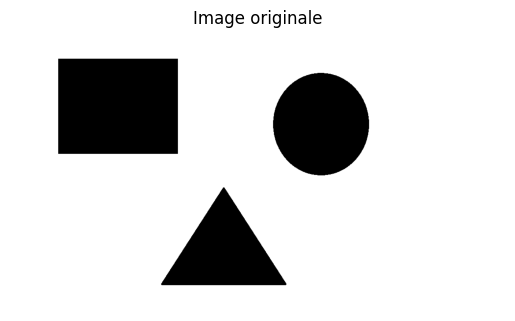

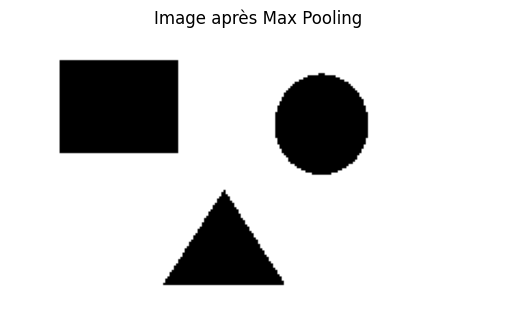

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from PIL import Image  # Pour charger l'image

# Chargement de l'image et conversion en niveaux de gris
image_path = "/content/shapes_tp1.png"
image = Image.open(image_path).convert('L')  # Convertir en niveaux de gris
image = np.array(image)  # Convertir l'image en tableau NumPy

# Affichage de l'image originale
plt.imshow(image, cmap='gray')
plt.title("Image originale")
plt.axis('off')  # Masquer les axes
plt.show()

# Définition de la taille de la fenêtre de pooling
pool_size = 5

# Dimensions de l'image
image_height, image_width = image.shape

# Dimensions de l'image de sortie après max pooling
output_height = image_height // pool_size
output_width = image_width // pool_size

# Préparation de l'image de sortie
output_image = np.zeros((output_height, output_width))

# Application de la couche de max pooling
for i in range(output_height):
    for j in range(output_width):
        # Extraction de la sous-région de l'image
        region = image[i * pool_size:(i + 1) * pool_size, j * pool_size:(j + 1) * pool_size]
        # Calcul du maximum de la sous-région
        output_image[i, j] = np.max(region)

# Affichage de l'image après max pooling
plt.imshow(output_image, cmap='gray')
plt.title("Image après Max Pooling")
plt.axis('off')  # Masquer les axes
plt.show()




Étape 3 : Fonction d'Activation

1. Implémentez des fonctions d'activation, comme ReLU (Rectified Linear Unit).



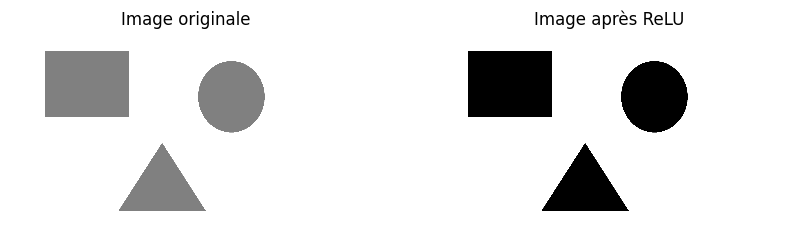

In [ ]:
#CODE ICI
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    """Applique la fonction d'activation ReLU."""
    return np.maximum(0, x)


# Application de la fonction ReLU sur l'image
output_image = relu(image)

# Affichage de l'image originale et de l'image après ReLU
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(image, cmap='gray', vmin=-3, vmax=3)
ax1.set_title("Image originale")
ax1.axis('off')  # Masquer les axes
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=3)
ax2.set_title("Image après ReLU")
ax2.axis('off')  # Masquer les axes
plt.show()


**Étape 4 : Construire un CNN avec Keras**

1. Utilisez les concepts précédents pour construire un CNN simple qui classifie les images du dataset MNIST (chiffres manuscrits).

In [ ]:
#CODE ICI
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# 1. Charger et Préparer le Dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normaliser les images (valeurs entre 0 et 1) et redimensionner
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Convertir les étiquettes en format one-hot
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 2. Construire le Modèle CNN
model = Sequential()

# Ajouter une couche de convolution
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Ajouter une couche de max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Ajouter une autre couche de convolution
model.add(Conv2D(64, (3, 3), activation='relu'))
# Ajouter une autre couche de max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplatir les sorties pour les couches denses
model.add(Flatten())
# Ajouter une couche dense
model.add(Dense(128, activation='relu'))
# Ajouter la couche de sortie
model.add(Dense(10, activation='softmax'))

# 3. Compiler le Modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Entraîner le Modèle
history = model.fit(x_train, y_train, epochs=10, batch_size=200, validation_data=(x_test, y_test))



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 54s 174ms/step - accuracy: 0.8291 - loss: 0.5995 - val_accuracy: 0.9799 - val_loss: 0.0673
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 49s 164ms/step - accuracy: 0.9804 - loss: 0.0666 - val_accuracy: 0.9826 - val_loss: 0.0562
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 87s 182ms/step - accuracy: 0.9863 - loss: 0.0468 - val_accuracy: 0.9877 - val_loss: 0.0365
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 78s 169ms/step - accuracy: 0.9885 - loss: 0.0386 - val_accuracy: 0.9888 - val_loss: 0.0304
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 81s 167ms/step - accuracy: 0.9904 - loss: 0.0309 - val_accuracy: 0.9912 - val_loss: 0.0272
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 85s 177ms/step - accuracy: 0.9929 - loss: 0.0229 - val_accuracy: 0.9901 - val_loss: 0.0293
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 79s 169ms/step - accuracy: 0.9946 - loss: 0.0174 - val_accuracy: 0.9894 - val_loss: 0.0315
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 81s 165ms/step - accuracy: 0.9958 - loss: 0

**Étape 5 : Évaluation du Modèle**

1. Évaluer la performance du modèle sur le jeu de données de test.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9877 - loss: 0.0373
Test accuracy: 0.9910


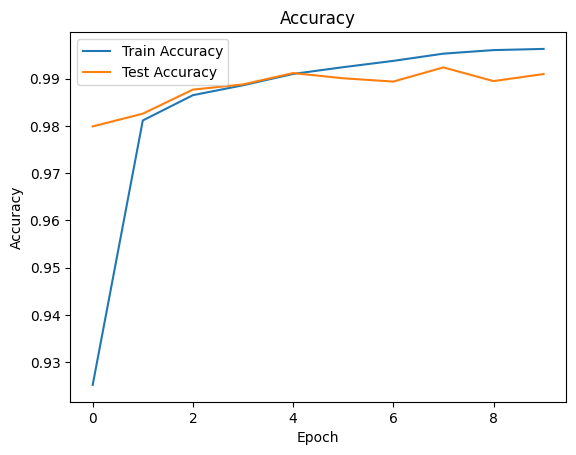

In [ ]:

# 5. Évaluer le Modèle
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Visualisation de l'historique de l'entraînement
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Étape 6 : Visualisation des Prédictions**

1. Choisissez quelques exemples du jeu de données de test et affichez l'image, la prédiction du modèle et le label réel.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


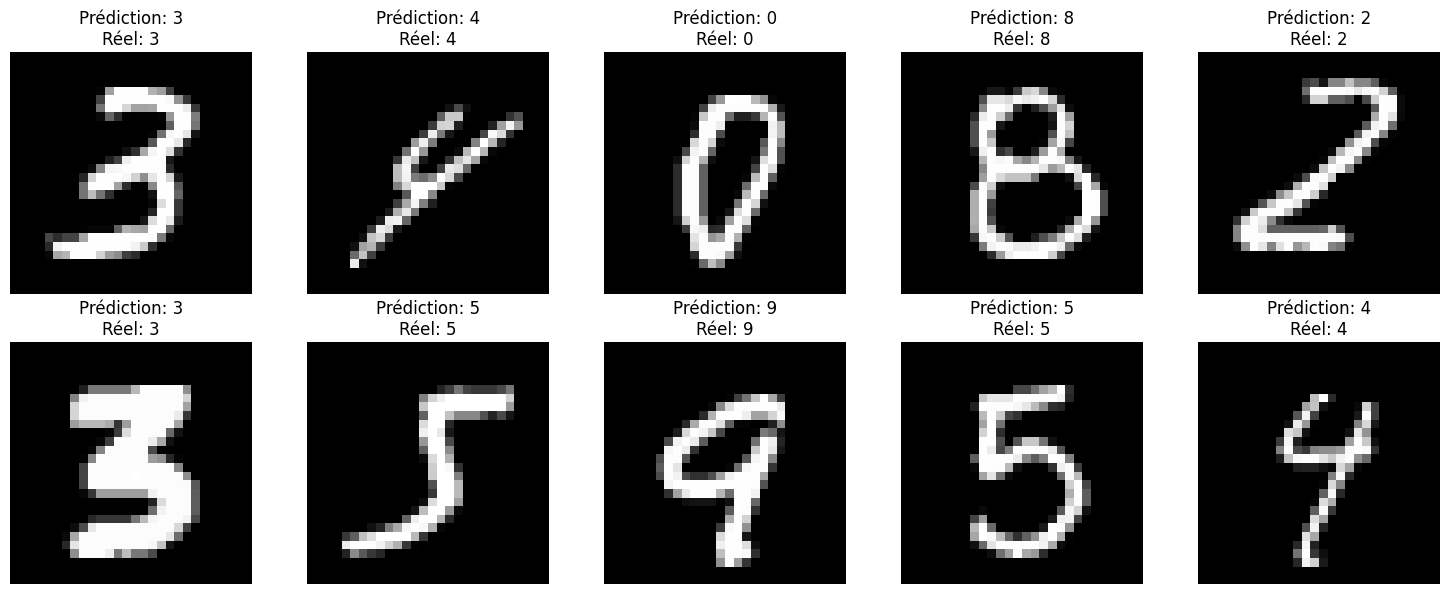

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Faire des prédictions sur le jeu de test
predictions = model.predict(x_test)

# Récupérer les labels réels
# Vérifiez si y_test est en one-hot ou non
if y_test.ndim > 1:  # Si y_test a plus d'une dimension, c'est en one-hot
    y_test_labels = np.argmax(y_test, axis=1)  # Convertir les étiquettes one-hot en labels
else:
    y_test_labels = y_test  # Si c'est déjà des labels

# Sélectionner quelques exemples à afficher
num_examples = 10  # Nombre d'exemples à afficher
indices = np.random.choice(len(x_test), num_examples, replace=False)  # Choisir des indices aléatoires

# Affichage des images, des prédictions et des labels réels
plt.figure(figsize=(15, 6))
for i, index in enumerate(indices):
    plt.subplot(2, num_examples // 2, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f'Prédiction: {np.argmax(predictions[index])}\nRéel: {y_test_labels[index]}')
    plt.axis('off')  # Masquer les axes

plt.tight_layout()
plt.show()
